In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',None)


# Importing Data

In [2]:
data=pd.read_csv('Life_Expectancy_Data.csv')


In [3]:
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Let us first check number of null values
missing=data.isnull().sum().sort_values(ascending=False)
missing_percentage=pd.DataFrame({'missing':missing,'percentage':round(missing/len(data)*100,2)})
missing_percentage

,missing,percentage
Population,652,22.19
Hepatitis B,553,18.82
GDP,448,15.25
Total expenditure,226,7.69
Alcohol,194,6.60
Income composition of resources,167,5.68
Schooling,163,5.55
thinness 5-9 years,34,1.16
thinness 1-19 years,34,1.16
BMI,34,1.16


In [6]:
# We can see empty strings in column name first replace it.
data.columns=data.columns.str.replace(' ','_')

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [8]:
data['Population'].fillna(data['Population'].mean(),inplace=True)
data['Hepatitis_B'].fillna(data['Hepatitis_B'].mean(),inplace=True)
data['GDP'].fillna(data['GDP'].mean(),inplace=True)
data['Total_expenditure'].fillna(data['Total_expenditure'].mean(),inplace=True)
data['Alcohol'].fillna(data['Alcohol'].mean(),inplace=True)
data['Income_composition_of_resources'].fillna(data['Income_composition_of_resources'].mean(),inplace=True)
data['Schooling'].fillna(data['Schooling'].mean(),inplace=True)
data['_thinness_5-9_years'].fillna(data['_thinness_5-9_years'].mean(),inplace=True)
data['_thinness__1-19_years'].fillna(data['_thinness__1-19_years'].mean(),inplace=True)
data['_BMI_'].fillna(data['_BMI_'].mean(),inplace=True)
data['Polio'].fillna(data['Polio'].mean(),inplace=True)
data['Diphtheria_'].fillna(data['Diphtheria_'].mean(),inplace=True)
data['Life_expectancy_'].fillna(data['Life_expectancy_'].mean(),inplace=True)
data['Adult_Mortality'].fillna(data['Adult_Mortality'].mean(),inplace=True)

In [9]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy_                   0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles_                           0
_BMI_                              0
under-five_deaths_                 0
Polio                              0
Total_expenditure                  0
Diphtheria_                        0
_HIV/AIDS                          0
GDP                                0
Population                         0
_thinness__1-19_years              0
_thinness_5-9_years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [10]:
#Outlier detection and dealing with it.


In [11]:
data['Status']=data['Status'].map({'Developing':0,'Developed':1})

In [12]:
data.head()

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
data.drop(['Country'],axis=1,inplace=True)

In [14]:
data.head()

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
data.describe()

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


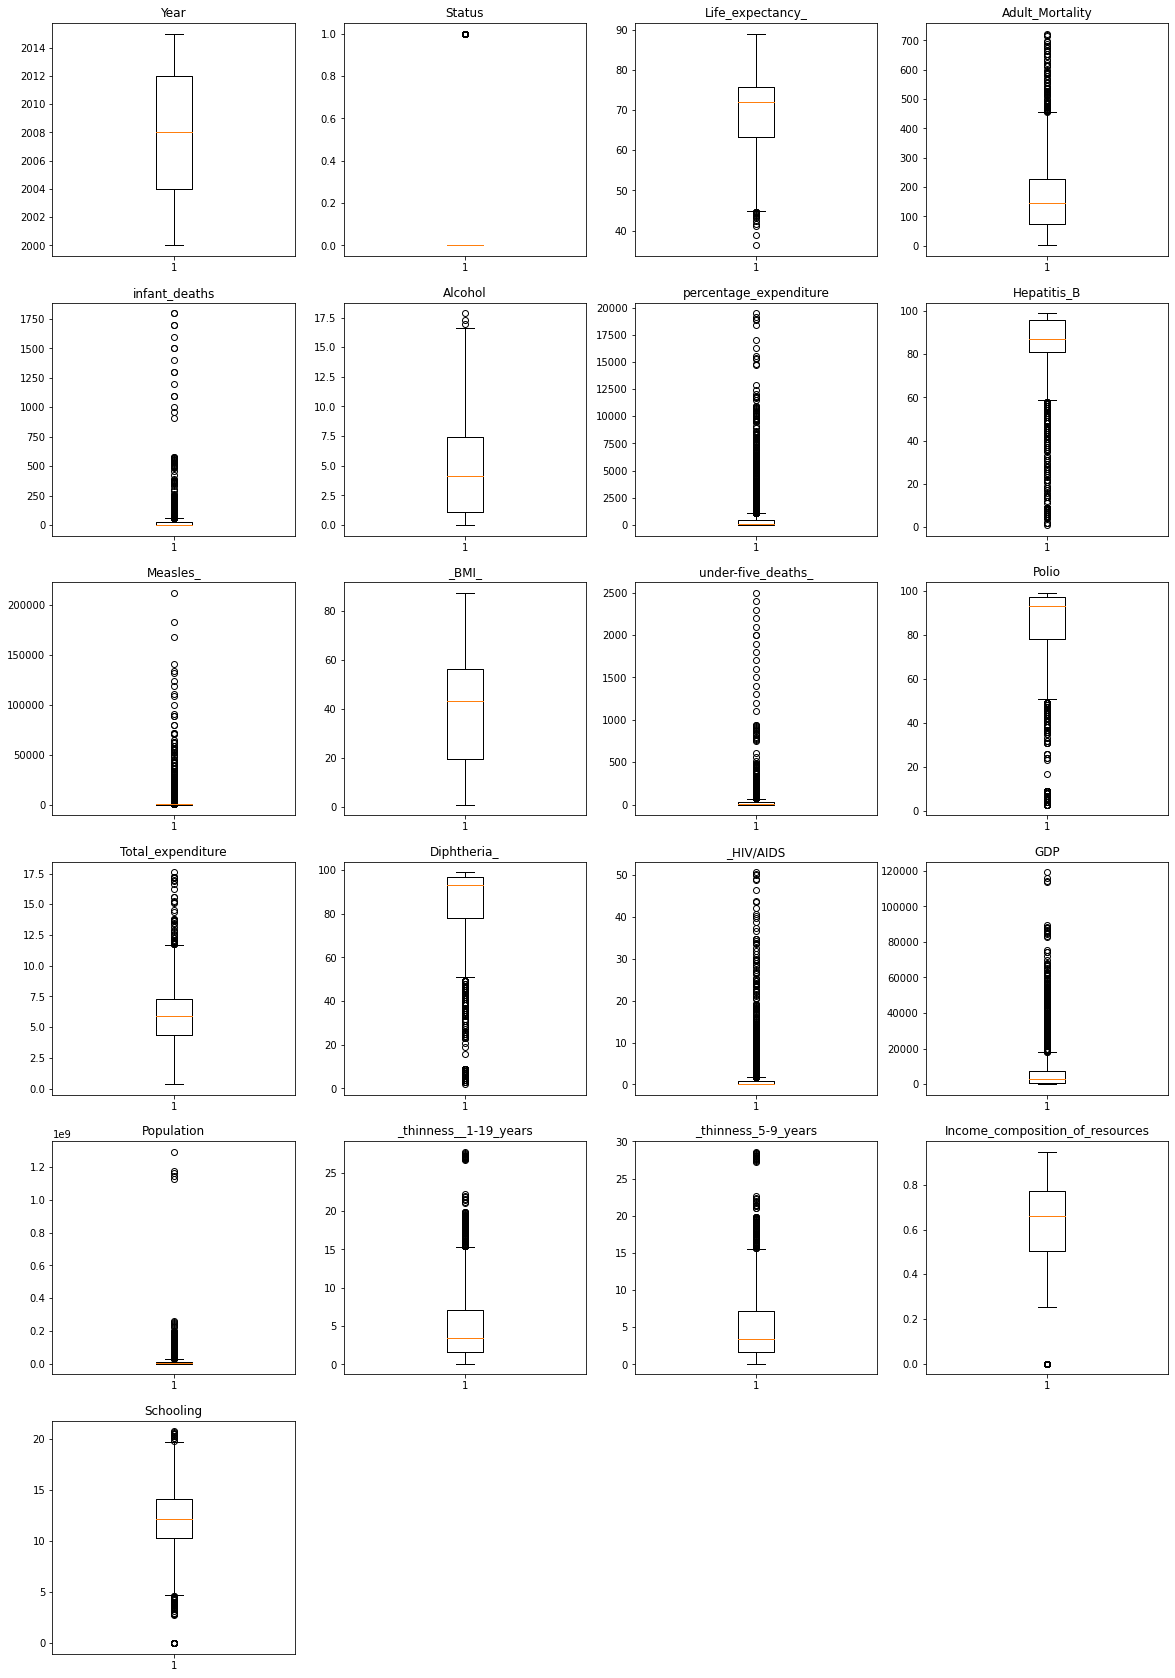

In [16]:
plt.figure(figsize=(20,30))
i=0
for var in list(data.columns):
    i+=1
    plt.subplot(6,4,i)
   
    plt.boxplot(data[var])
    plt.title(var)
    
plt.show()


In [17]:
# from above boxplot we can see that data is having outliers so lets deal with outliers

In [18]:
def outliers(var,data):
    print(15*'-'+var+ 15*'-')
    q75,q25=np.percentile(data[var],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    outlier_max=data[var]>max_val
    outlier_min=data[var]<min_val
    outlier_count=len(np.where((outlier_max)|(outlier_min))[0])
    outlier_percentage=round(outlier_count/len(data[var])*100,2)
    print("Outlier counts:{}".format(outlier_count))
    print("Outlier Percentage:{}".format(outlier_percentage))
    
    

In [19]:
for col in list(data.columns):
    outliers(col,data)

---------------Year---------------
Outlier counts:0
Outlier Percentage:0.0
---------------Status---------------
Outlier counts:512
Outlier Percentage:17.43
---------------Life_expectancy_---------------
Outlier counts:17
Outlier Percentage:0.58
---------------Adult_Mortality---------------
Outlier counts:86
Outlier Percentage:2.93
---------------infant_deaths---------------
Outlier counts:315
Outlier Percentage:10.72
---------------Alcohol---------------
Outlier counts:3
Outlier Percentage:0.1
---------------percentage_expenditure---------------
Outlier counts:389
Outlier Percentage:13.24
---------------Hepatitis_B---------------
Outlier counts:316
Outlier Percentage:10.76
---------------Measles_---------------
Outlier counts:542
Outlier Percentage:18.45
---------------_BMI_---------------
Outlier counts:0
Outlier Percentage:0.0
---------------under-five_deaths_---------------
Outlier counts:394
Outlier Percentage:13.41
---------------Polio---------------
Outlier counts:279
Outlier Per

In [20]:
data.quantile(np.arange(0.00,0.10,0.01).tolist()+np.arange(0.10,0.90,0.1).tolist()+np.arange(0.90,0.99,0.01).tolist()+np.arange(0.99,1.00,0.001).tolist())

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0.000,2000.0,0.0,36.300,1.000,0.000,0.010000,0.000000,1.000000,0.000,1.0000,0.000,3.0,0.37000,2.00,0.1000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.0000
0.010,2000.0,0.0,45.600,4.370,0.000,0.010000,0.000000,6.000000,0.000,2.3000,0.000,6.0,1.25740,6.00,0.1000,24.455693,8.138700e+02,0.200000,0.100000,0.000000,2.9000
0.020,2000.0,0.0,47.322,7.000,0.000,0.010000,0.000000,8.000000,0.000,2.7000,0.000,7.0,1.42000,7.00,0.1000,37.103256,3.761780e+03,0.200000,0.200000,0.000000,4.5000
0.030,2000.0,0.0,48.500,11.000,0.000,0.010000,0.000000,8.000000,0.000,3.4110,0.000,8.0,1.60000,8.00,0.1000,47.564137,6.443070e+03,0.300000,0.300000,0.000000,5.1000
0.040,2000.0,0.0,49.800,12.000,0.000,0.010000,0.000000,9.000000,0.000,4.4000,0.000,9.0,1.86000,9.00,0.1000,63.460031,1.053720e+04,0.500000,0.400000,0.000000,5.5000
0.050,2000.0,0.0,51.400,13.000,0.000,0.010000,0.000000,9.000000,0.000,5.2000,0.000,9.0,1.98850,9.00,0.1000,81.834917,1.464415e+04,0.600000,0.500000,0.291000,5.9000
0.060,2000.0,0.0,52.000,14.000,0.000,0.010000,0.000000,21.220000,0.000,5.7000,0.000,26.0,2.31000,23.22,0.1000,113.343996,1.877204e+04,0.600000,0.500000,0.318000,6.5000
0.070,2001.0,0.0,52.559,15.000,0.000,0.010000,0.000000,35.590000,0.000,6.1590,0.000,41.0,2.51590,35.00,0.1000,131.864613,2.443620e+04,0.700000,0.600000,0.341000,6.9590
0.080,2001.0,0.0,53.200,16.000,0.000,0.010000,0.000000,43.000000,0.000,6.5000,0.000,45.0,2.65000,41.00,0.1000,148.909966,2.984600e+04,0.700000,0.600000,0.363000,7.2000
0.090,2001.0,0.0,54.000,17.000,0.000,0.010000,0.000000,48.000000,0.000,6.9000,0.000,47.0,2.80000,45.00,0.1000,177.058155,3.944977e+04,0.800000,0.700000,0.381330,7.6000


In [21]:
cols_to_cap=['Adult_Mortality','infant_deaths','percentage_expenditure','Measles_','under-five_deaths_','Total_expenditure','_HIV/AIDS','GDP','Population','_thinness__1-19_years','_thinness_5-9_years']

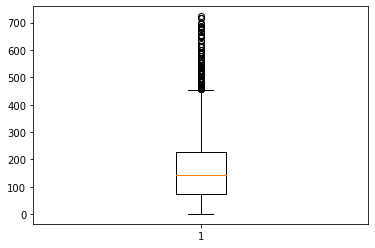

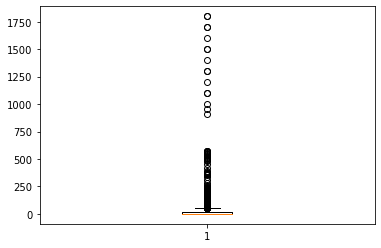

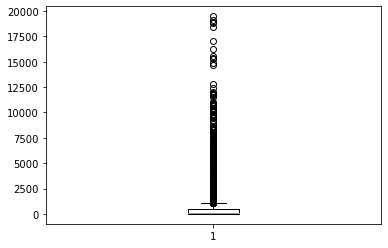

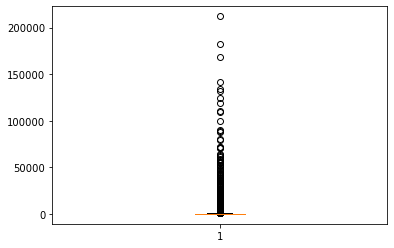

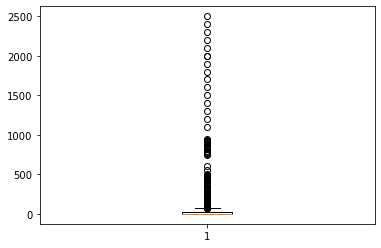

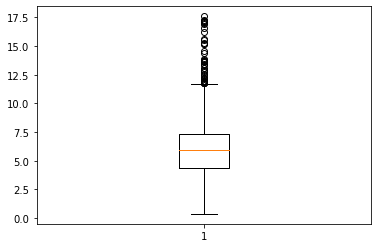

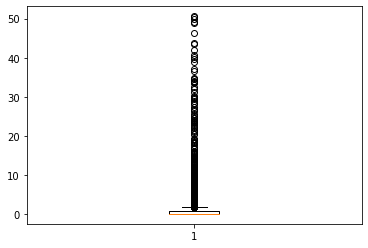

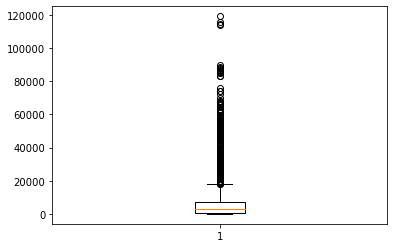

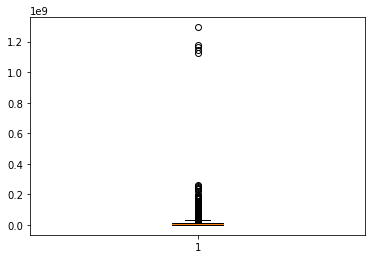

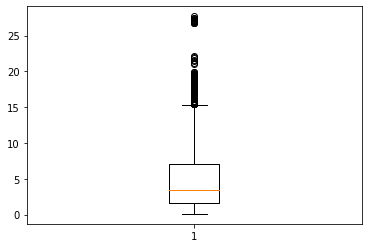

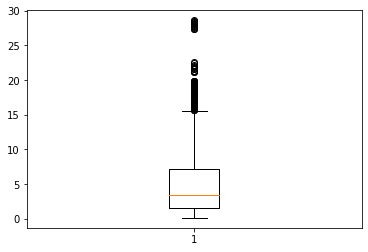

In [22]:
for cols in cols_to_cap:
    plt.figure()
    plt.boxplot(data[cols])

In [23]:
capping_value=[452.000,246.520,623.630843,4359.030,767.820,11.61560,10.8000,18624.381093,1.469384e+08,17.800000,18.226000]

In [24]:
def cap_updater(org,val):
    if org>val:
        return val
    else:
        return org

In [25]:
for i in range(len(cols_to_cap)):
    data[cols_to_cap[i]]=data.apply(lambda x:cap_updater(x[cols_to_cap[i]],capping_value[i]),axis=1)

In [26]:
data.describe()

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.00000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.224932,161.891411,21.593492,4.602861,208.492943,80.940461,660.396511,38.321247,35.877672,82.550188,5.901675,82.324084,1.266508,5223.607217,1.058476e+07,4.767274,4.79378,0.627551,11.992793
std,4.613841,0.379405,9.507640,115.147266,46.421659,3.916288,247.632221,22.586855,1348.652865,19.927677,98.948058,23.352143,2.282161,23.640073,2.596908,5779.944669,2.129902e+07,4.111464,4.17936,0.204820,3.264381
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.10000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.60000,0.504250,10.300000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.40000,0.662000,12.100000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.20000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,452.000000,246.520000,17.870000,623.630843,99.000000,4359.030000,87.300000,767.820000,99.000000,11.615600,99.000000,10.800000,18624.381093,1.469384e+08,17.800000,18.22600,0.948000,20.700000


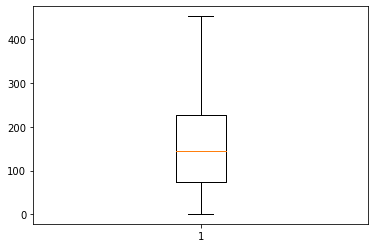

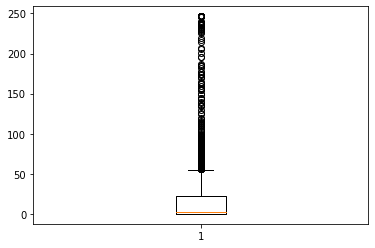

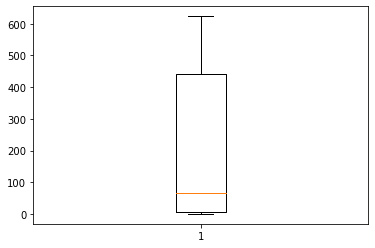

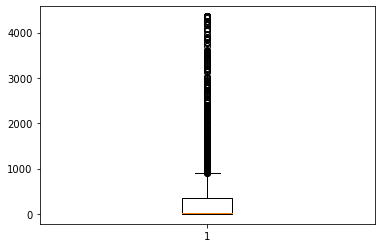

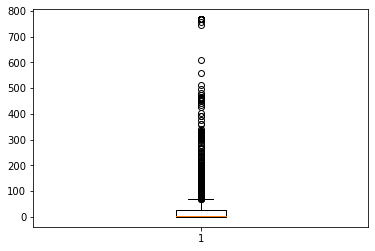

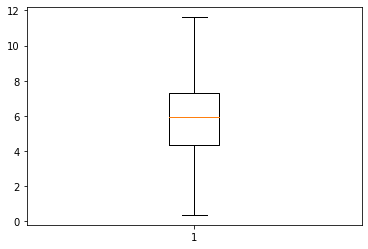

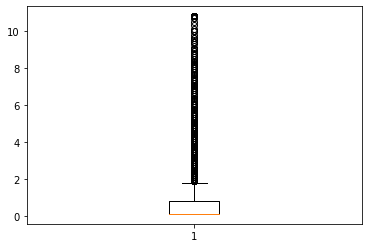

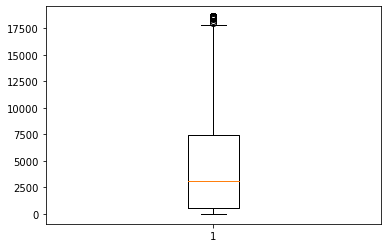

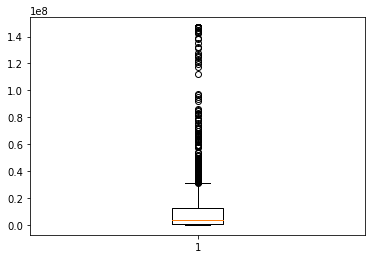

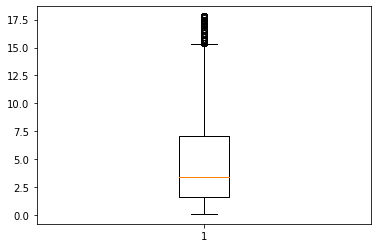

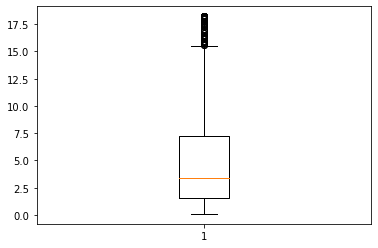

In [27]:
for cols in cols_to_cap:
    plt.figure()
    plt.boxplot(data[cols])

In [28]:
lower_cap=['Life_expectancy_','Hepatitis_B','Polio','Diphtheria_','Income_composition_of_resources','Schooling']

In [29]:
cap_val=[49.800,9.000000,26.0,23.22,0.291000,2.9000]

In [30]:
def cap_update(org,val):
    if org<val:
        return val
    else:
        return org
    

In [31]:
for i in range(len(lower_cap)):
    data[lower_cap[i]]=data.apply(lambda x:cap_update(x[lower_cap[i]],cap_val[i]),axis=1)

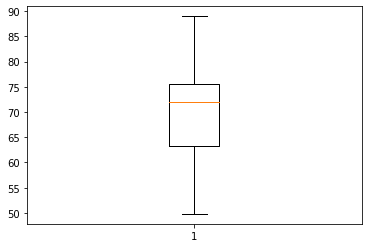

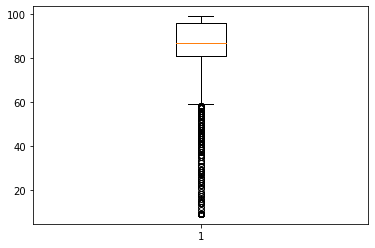

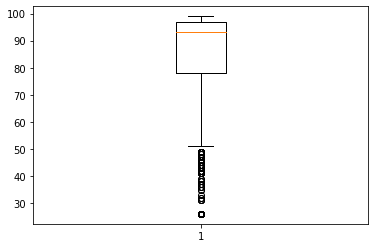

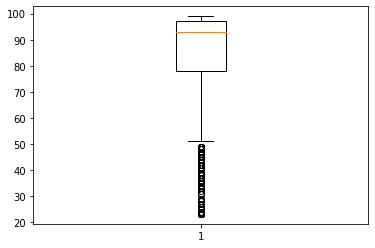

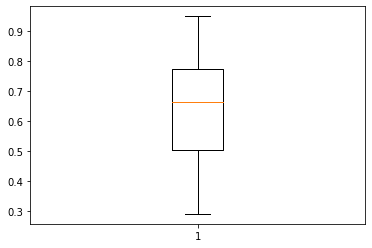

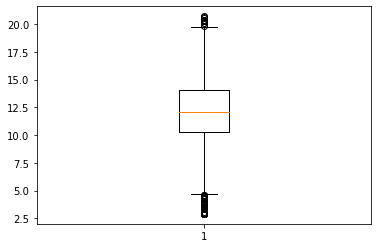

In [32]:
for cols in lower_cap:
    plt.figure()
    plt.boxplot(data[cols])

In [33]:
data.describe()

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.00000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.344333,161.891411,21.593492,4.602861,208.492943,81.016023,660.396511,38.321247,35.877672,83.635961,5.901675,83.240333,1.266508,5223.607217,1.058476e+07,4.767274,4.79378,0.640524,12.020465
std,4.613841,0.379405,9.229519,115.147266,46.421659,3.916288,247.632221,22.338767,1348.652865,19.927677,98.948058,20.028602,2.282161,20.859231,2.596908,5779.944669,2.129902e+07,4.111464,4.17936,0.171164,3.173616
min,2000.000000,0.000000,49.800000,1.000000,0.000000,0.010000,0.000000,9.000000,0.000000,1.000000,0.000000,26.000000,0.370000,23.220000,0.100000,1.681350,3.400000e+01,0.100000,0.10000,0.291000,2.900000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.60000,0.504250,10.300000
50%,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.40000,0.662000,12.100000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.20000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,452.000000,246.520000,17.870000,623.630843,99.000000,4359.030000,87.300000,767.820000,99.000000,11.615600,99.000000,10.800000,18624.381093,1.469384e+08,17.800000,18.22600,0.948000,20.700000


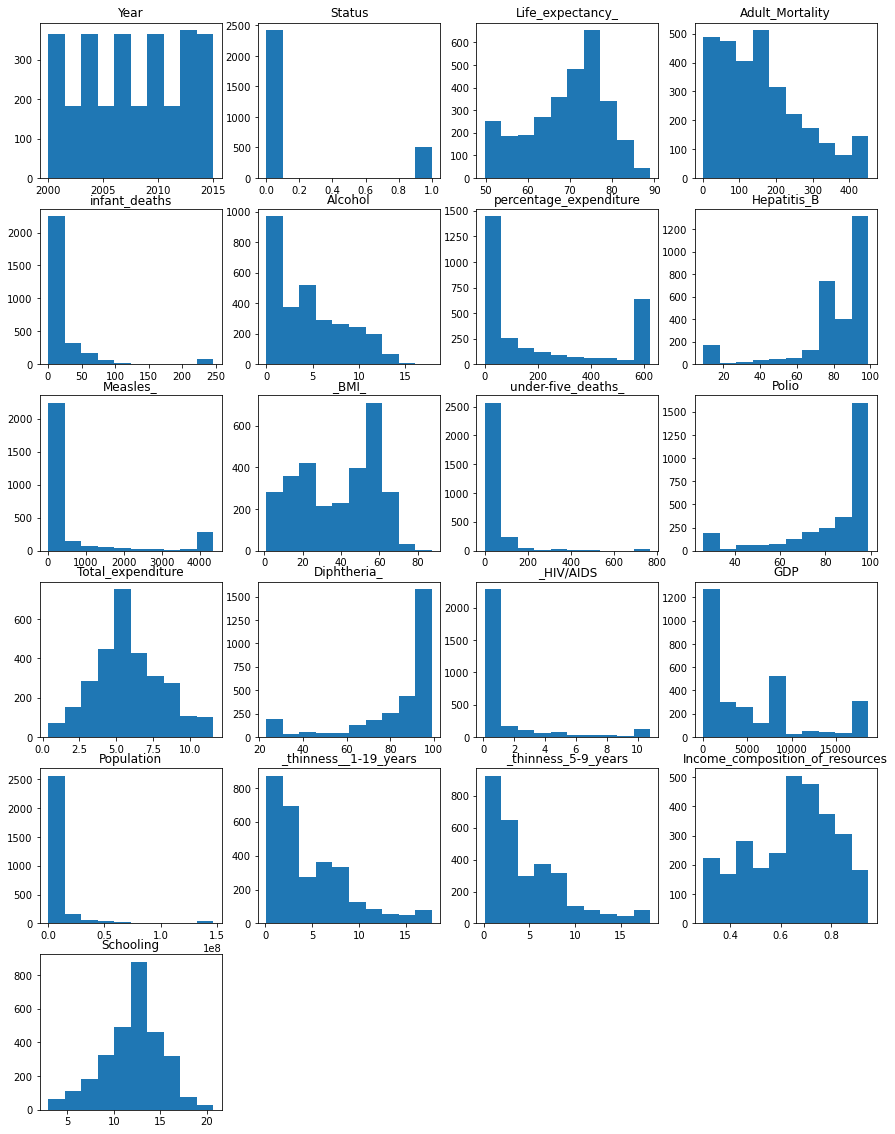

In [39]:
plt.figure(figsize=(15,20))
for i,col in enumerate(list(data.columns),1):
    plt.subplot(6,4,i)
    plt.hist(data[col])
    plt.title(col)

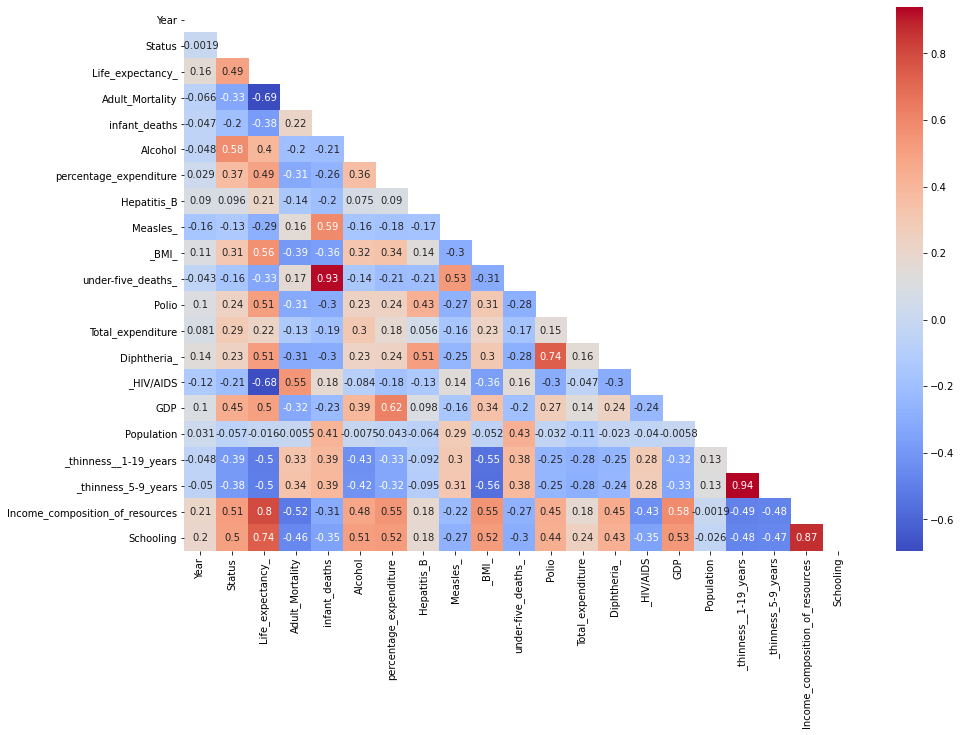

In [45]:
mask=np.triu(data.corr())
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),mask=mask,annot=True,cmap='coolwarm');

In [51]:
#!pip install xgboost

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [54]:
X=data.drop(['Life_expectancy_'],axis=1)
y=data['Life_expectancy_']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2350, 20), (588, 20), (2350,), (588,))

# Decision Tree

In [58]:
DT=DecisionTreeRegressor()

In [59]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [61]:
dt_predict=DT.predict(X_test)

In [62]:
dt_predict

array([72.9       , 76.2       , 74.9       , 76.9       , 54.1       ,
       49.8       , 67.6       , 74.        , 76.8       , 52.4       ,
       51.9       , 52.3       , 55.        , 69.6       , 68.4       ,
       62.1       , 57.3       , 78.3       , 72.3       , 78.9       ,
       79.4       , 89.        , 72.5       , 66.2       , 69.9       ,
       68.        , 49.8       , 64.1       , 81.6       , 65.8       ,
       67.3       , 73.9       , 76.        , 71.9       , 78.7       ,
       49.8       , 57.2       , 72.2       , 62.8       , 74.1       ,
       54.7       , 59.7       , 74.9       , 79.7       , 76.8       ,
       49.8       , 80.        , 65.8       , 64.7       , 71.4       ,
       55.9       , 66.2       , 81.        , 83.        , 72.9       ,
       57.5       , 73.        , 78.7       , 64.9       , 69.9       ,
       79.1       , 54.4       , 74.1       , 66.6       , 52.9       ,
       54.5       , 51.5       , 77.        , 59.1       , 78.1 

In [65]:
DT.score(X_test,y_test)

0.9353173378196707

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
mse_dt=mean_squared_error(y_test,dt_predict)

In [73]:
print('Mean squared error',mse_dt)

Mean squared error 5.395408616323314


In [76]:
r2_score_dt=r2_score(y_test,dt_predict)

In [77]:
print('R2 Score: ',r2_score_dt)

R2 Score:  0.9353173378196707


In [92]:
DT_predict_df=pd.DataFrame({'Actual':y_test,'Predict':dt_predict})

In [94]:
DT_predict_df.head(10)

,Actual,Predict
2546,73.7,72.9
650,75.9,76.2
1740,74.2,74.9
177,76.8,76.9
1377,51.9,54.1
535,49.8,49.8
2371,67.4,67.6
2014,73.9,74.0
321,77.2,76.8
2493,55.0,52.4


# Random Forest

In [79]:
RF=RandomForestRegressor()

In [80]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
RF_predict=RF.predict(X_test)

In [82]:
RF_predict

array([72.97      , 75.743     , 74.983     , 76.172     , 52.829     ,
       52.366     , 65.815     , 73.865     , 76.851     , 54.275     ,
       52.191     , 52.923     , 57.175     , 74.196     , 69.50924932,
       62.305     , 58.033     , 79.182     , 69.529     , 78.869     ,
       80.412     , 84.238     , 72.432     , 68.487     , 71.46774522,
       67.799     , 56.297     , 65.255     , 82.494     , 74.081     ,
       67.358     , 74.224     , 74.307     , 72.151     , 78.511     ,
       50.892     , 60.137     , 72.38274795, 64.181     , 73.968     ,
       54.853     , 60.867     , 75.468     , 81.844     , 76.462     ,
       52.008     , 79.939     , 74.759     , 59.209     , 72.384     ,
       54.44      , 72.034     , 82.099     , 80.917     , 74.583     ,
       57.723     , 73.195     , 75.358     , 63.674     , 69.244     ,
       78.332     , 54.397     , 74.464     , 72.13      , 53.763     ,
       53.549     , 52.67      , 76.303     , 59.238     , 72.13

In [84]:
RF.score(X_test,y_test)

0.9689849531333422

In [85]:
mse_RF=mean_squared_error(y_test,RF_predict)

In [86]:
mse_RF

2.58707427089985

In [87]:
r2_score_RF=r2_score(y_test,RF_predict)

In [88]:
r2_score_RF

0.9689849531333422

In [89]:
RF_predict_df=pd.DataFrame({'Actual':y_test,'Predict':RF_predict})

In [91]:
RF_predict_df.head(10)

,Actual,Predict
2546,73.7,72.970
650,75.9,75.743
1740,74.2,74.983
177,76.8,76.172
1377,51.9,52.829
535,49.8,52.366
2371,67.4,65.815
2014,73.9,73.865
321,77.2,76.851
2493,55.0,54.275


# SVR

In [95]:
svr=SVR()

In [96]:
svr.fit(X_train,y_train)

SVR()

In [99]:
svr_predict=svr.predict(X_test)

In [100]:
svr_predict

array([72.19941976, 71.65388868, 71.76546345, 72.75906328, 72.19202218,
       72.80714297, 71.7390447 , 72.14809324, 71.66020874, 71.87371534,
       72.5840214 , 72.75886704, 71.67434428, 71.65373958, 71.65953066,
       71.83132716, 71.93477132, 72.74688111, 72.76242657, 72.38943186,
       72.48843455, 72.75906229, 72.5301145 , 72.7588673 , 71.7191224 ,
       71.81852563, 71.78471255, 71.77814684, 71.75885461, 71.765051  ,
       71.12623297, 71.65373048, 72.28723968, 71.78480254, 71.66220033,
       72.23665849, 72.58944266, 71.6554085 , 71.73970482, 72.58593623,
       71.74399825, 72.6481657 , 72.7590635 , 71.69025386, 72.23039798,
       71.7303498 , 71.66446396, 71.65366073, 71.96840841, 67.60049457,
       72.75885786, 72.7588673 , 71.67406294, 72.75886694, 71.72843676,
       72.25976597, 72.16779835, 71.65377098, 71.6767097 , 67.60049417,
       72.75886729, 71.74649348, 72.75886719, 71.6625221 , 72.77985877,
       73.90614608, 72.62095736, 72.3560937 , 72.34007479, 71.71

In [101]:
svr.score(X_test,y_test)

-0.10183741372695954

In [102]:
mse_svr=mean_squared_error(y_test,svr_predict)

In [103]:
mse_svr

91.90813852460349

In [104]:
r2_score_svr=r2_score(y_test,svr_predict)

In [105]:
r2_score_svr

-0.10183741372695954

In [117]:
svr_predict_df=pd.DataFrame({'Actual':y_test,'Predict':svr_predict})
svr_predict_df.head(10)

,Actual,Predict
2546,73.7,72.199420
650,75.9,71.653889
1740,74.2,71.765463
177,76.8,72.759063
1377,51.9,72.192022
535,49.8,72.807143
2371,67.4,71.739045
2014,73.9,72.148093
321,77.2,71.660209
2493,55.0,71.873715


# XGBoost

In [107]:
xgb=XGBRegressor()

In [108]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [110]:
xgb_predict=xgb.predict(X_test)

In [111]:
xgb_predict

array([73.36261 , 75.05126 , 74.685295, 76.15144 , 53.328644, 54.86493 ,
       66.486786, 74.20451 , 78.920586, 54.335712, 51.68794 , 52.61829 ,
       56.312775, 72.16986 , 70.535484, 62.734676, 58.419636, 79.674515,
       66.21134 , 78.30229 , 80.766174, 85.85246 , 71.50784 , 66.45437 ,
       71.9211  , 69.59171 , 53.32188 , 64.26223 , 81.41624 , 77.26856 ,
       66.73346 , 74.3127  , 74.93933 , 72.43359 , 78.238045, 50.92327 ,
       60.380985, 73.286415, 62.932087, 73.92127 , 54.17032 , 60.04543 ,
       75.47621 , 82.57776 , 76.033424, 49.684273, 80.22544 , 75.01635 ,
       55.984688, 73.263145, 53.810966, 70.720215, 80.84409 , 81.1893  ,
       74.25376 , 58.454666, 72.86264 , 75.14036 , 61.32304 , 72.3693  ,
       78.800934, 54.190765, 73.837296, 72.11289 , 52.247414, 55.58668 ,
       52.591194, 76.73758 , 59.08731 , 72.95352 , 82.94326 , 77.54482 ,
       73.43805 , 52.10889 , 57.29971 , 68.337074, 64.458305, 75.04814 ,
       55.95877 , 65.82073 , 64.95503 , 61.77293 , 

In [112]:
xgb.score(X_test,y_test)

0.9636892439076964

In [113]:
xgb_mse=mean_squared_error(y_test,xgb_predict)
xgb_mse

3.028808024930181

In [114]:
r2_score_xgb=r2_score(y_test,xgb_predict)

In [115]:
r2_score_xgb

0.9636892439076964

In [119]:
xgb_predict_df=pd.DataFrame({'Actual':y_test,'Predict':xgb_predict})
xgb_predict_df.head(10)

,Actual,Predict
2546,73.7,73.362610
650,75.9,75.051262
1740,74.2,74.685295
177,76.8,76.151443
1377,51.9,53.328644
535,49.8,54.864929
2371,67.4,66.486786
2014,73.9,74.204514
321,77.2,78.920586
2493,55.0,54.335712


# Cross validation

In [123]:
models=[]
models.append(('DT',DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('svr',SVR()))
models.append(('xgb',XGBRegressor()))

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [134]:
names=[]
results=[]
num_folds=10
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=42,shuffle=True)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('{}:results={}'.format(name,cv_results))
    #rint('{}:mean:'.format(name,cv_results.mean())
    print('{}:MSE={}, STD={}'.format(name,cv_results.mean(),cv_results.std()))

DT:results=[0.92494079 0.92428871 0.90920247 0.90286557 0.93455985 0.92117007
 0.89697335 0.89762054 0.90183405 0.89343654]
DT:MSE=0.9106891937449065, STD=0.01366057235423158
RF:results=[0.96531663 0.97033272 0.95109374 0.94940171 0.96145085 0.96756446
 0.96212714 0.94777479 0.95565558 0.96003058]
RF:MSE=0.9590748197632877, STD=0.007418212866852871
svr:results=[-0.08593815 -0.17562197 -0.14813569 -0.05856018 -0.10027014 -0.0538457
 -0.05854657 -0.0251093  -0.06755973 -0.1211203 ]
svr:MSE=-0.0894707726653021, STD=0.04449473027603243
xgb:results=[0.9599397  0.97052155 0.95136654 0.95631352 0.96178385 0.96064384
 0.95508879 0.94805164 0.95714457 0.95345313]
xgb:MSE=0.9574307140573703, STD=0.005952446047499788


In [135]:
# Results without cross validation are better there is not much difference after cross validation